In [1]:
import pandas as pd
import sqlite3
from pandas.plotting import scatter_matrix

In [2]:
conn = sqlite3.connect("../data/checking-logs.sqlite")

In [3]:
test = pd.read_sql('SELECT * FROM test', conn)

In [4]:
pageviews = pd.read_sql('SELECT * FROM pageviews', conn)

In [5]:
checker = pd.read_sql('SELECT * FROM checker', conn)

In [6]:
deadlines = pd.read_sql('SELECT * FROM deadlines', conn)

In [7]:
query = """
SELECT t.uid, AVG((CAST(strftime('%s',t.first_commit_ts) AS INTEGER) - d.deadlines ) / 3600) as avg_delta, COUNT(DISTINCT c.timestamp), COUNT(DISTINCT p.datetime)
FROM test t
JOIN deadlines d ON t.labname = d.labs
JOIN pageviews p ON t.uid = p.uid
JOIN checker c ON c.labname = d.labs AND t.uid = c.uid
WHERE t.labname != 'project1'
GROUP BY t.uid
"""
checker = pd.read_sql(query, conn)
checker.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   uid                          11 non-null     object 
 1   avg_delta                    11 non-null     float64
 2   COUNT(DISTINCT c.timestamp)  11 non-null     int64  
 3   COUNT(DISTINCT p.datetime)   11 non-null     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 480.0+ bytes


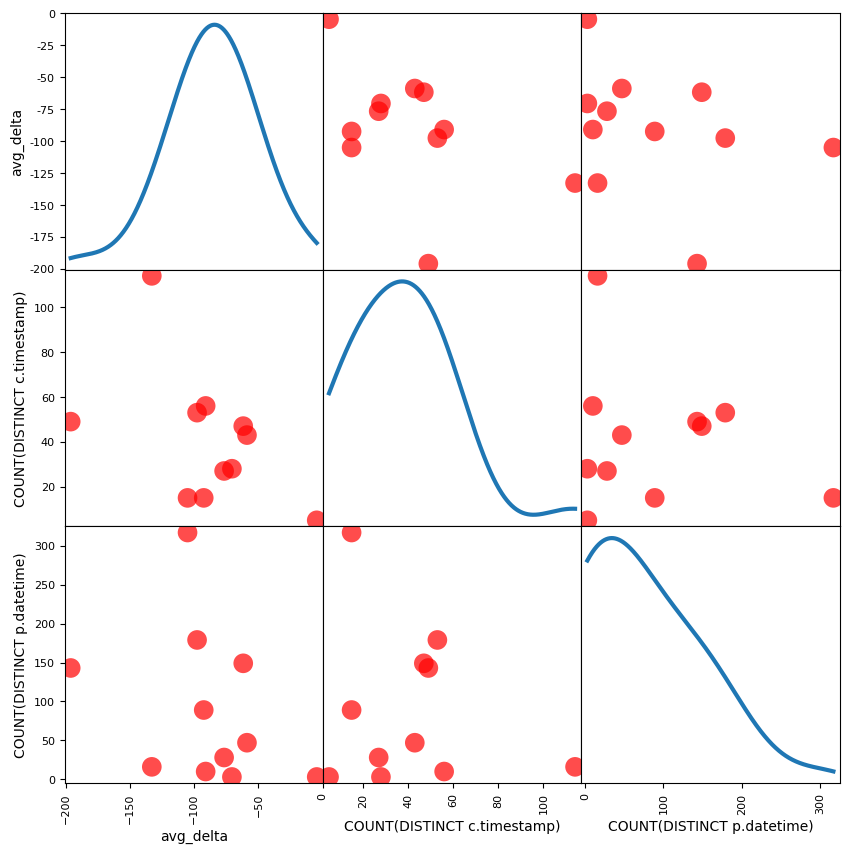

In [8]:
axes = pd.plotting.scatter_matrix(
    checker, 
    alpha=0.7,        
    figsize=(10, 10), 
    diagonal='kde',  
    marker='o',       
    s=200,
    color='red'
)
for i in range(len(axes)):
    for j in range(len(axes[i])):
        if i == j:
            for line in axes[i][j].get_lines():
                line.set_linewidth(3)

In [9]:
conn.close()